In [45]:
import importlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os.path import join
import os
import seaborn as sns
import lib.utils_RSA as rsa

importlib.reload(rsa)



<module 'lib.utils_RSA' from '/home/alban/SAYCam_Vs_EGO4D/lib/utils_RSA.py'>

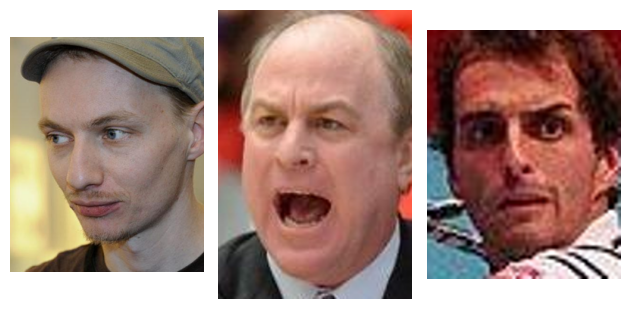

In [46]:
# First look at some of the images
dataset = '100_faces' # alternatively 100_faces or hm_IT
path2dataset = f'testsets/{dataset}'

listimages = os.listdir(path2dataset)
fig, subs = plt.subplots(1,3)
for i, img in enumerate(listimages[:3]):
    img = cv2.imread(join(path2dataset, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    subs[i].imshow(img)
    subs[i].axis('off')
fig.tight_layout()
plt.show()

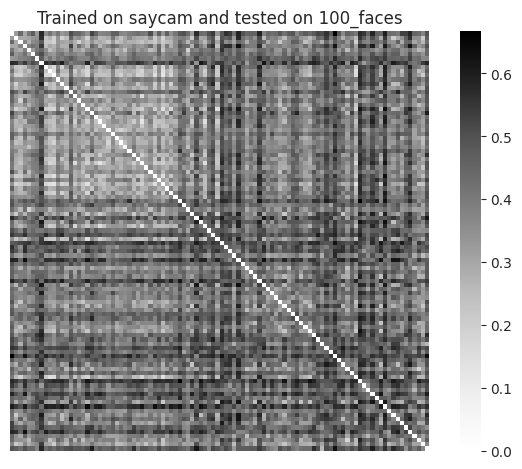

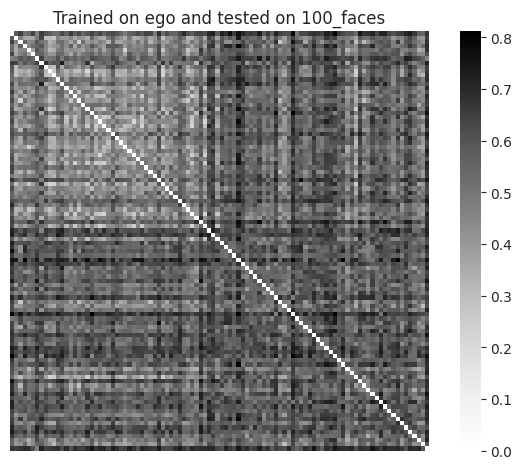

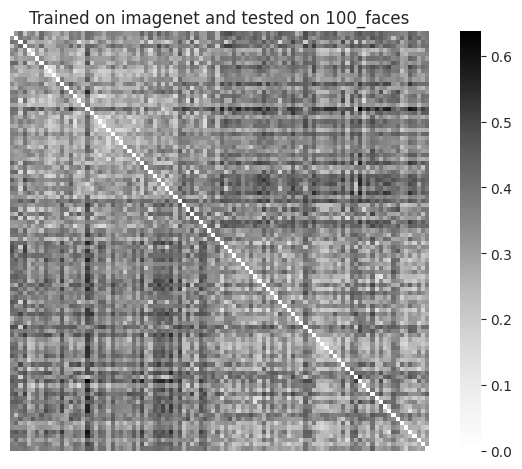

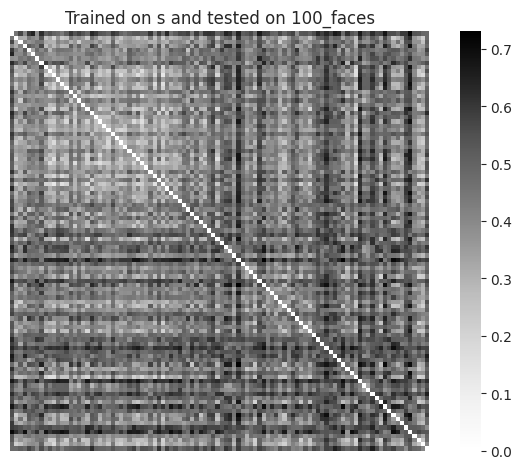

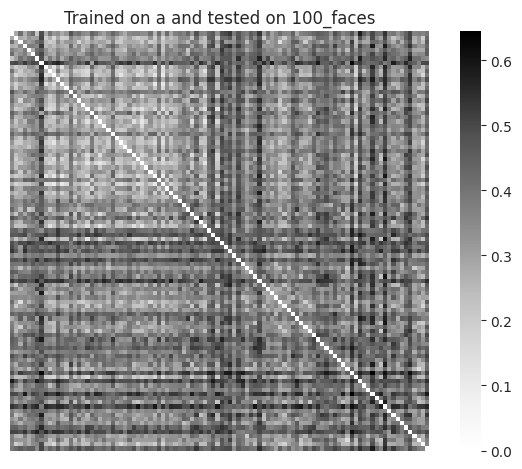

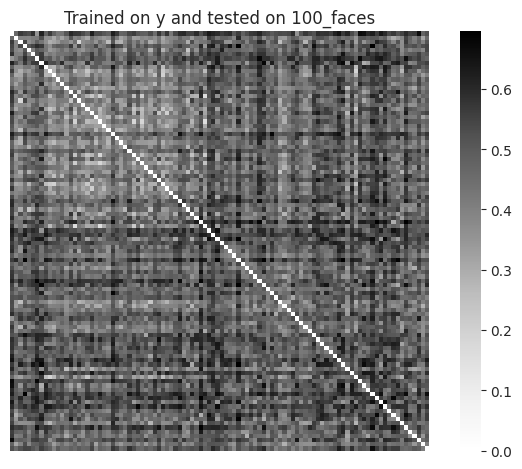

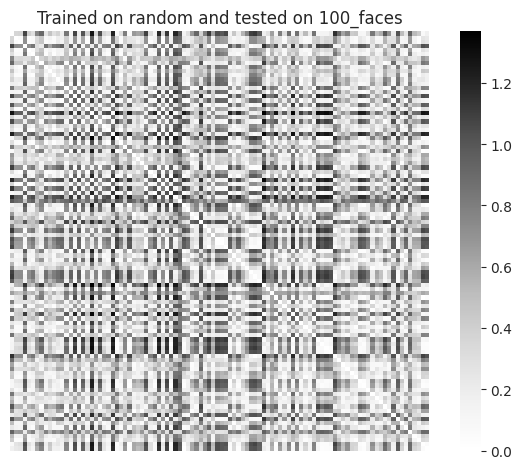

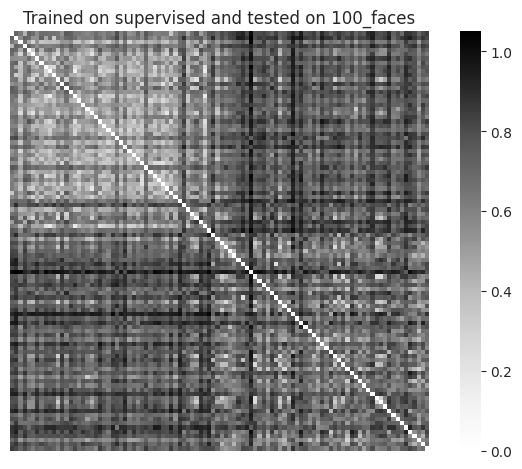

In [47]:

models = ['saycam', 'ego', 'imagenet', 's', 'a', 'y', 'random', 'supervised']

def sort_key(filename):
    # Split by underscore and extract number and letter
    parts = filename.split('_')
    if len(parts) >= 2:
        number = int(parts[0])  # First part is the number
        letter = parts[1][0]    # First character of second part is the letter
        return (letter, number)
    return (filename,)  # Fallback

listimages = os.listdir(path2dataset)
#listimages = natsorted(listimages) # for hm_IT dataset or
listimages = sorted(listimages, key=sort_key) #for 100_faces
#print(listimages)

RDMs = {}
for i, model in enumerate(models):
    RDMs[model] = rsa.compute_RDMs(model, dataset, listimages)

In [48]:
for model in models:
    print(f'{np.min(RDMs[model])} and {np.max(RDMs[model])}')

0.0 and 0.6665381318394988
0.0 and 0.8116206883710774
0.0 and 0.6372604963841402
0.0 and 0.7302690198855446
0.0 and 0.6441294756477687
0.0 and 0.6956598272872586
0.0 and 1.5923937406074142
0.0 and 1.049883134340188


In [49]:
SIMs = rsa.corrs_layers(RDMs, models)


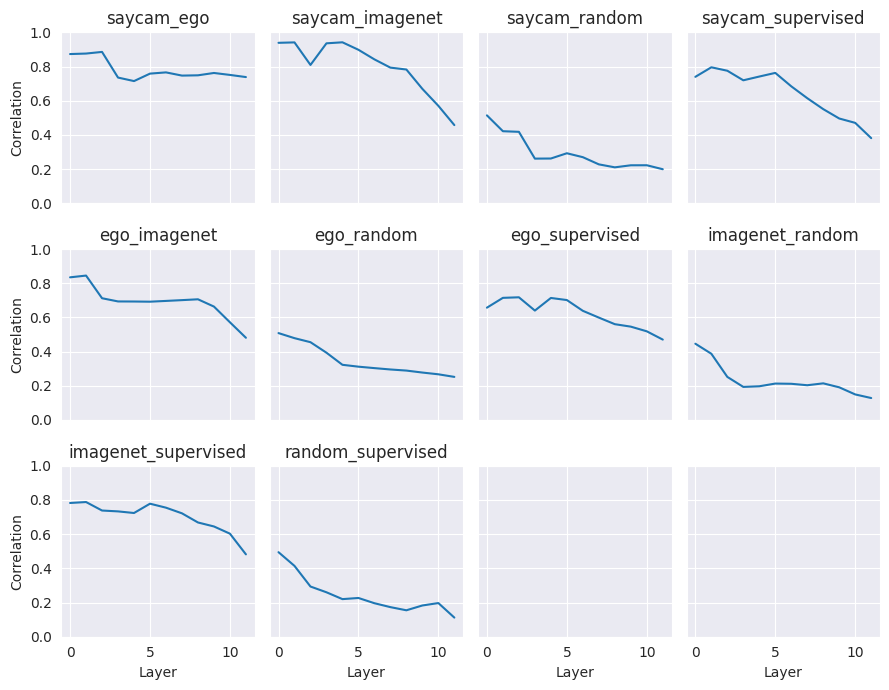

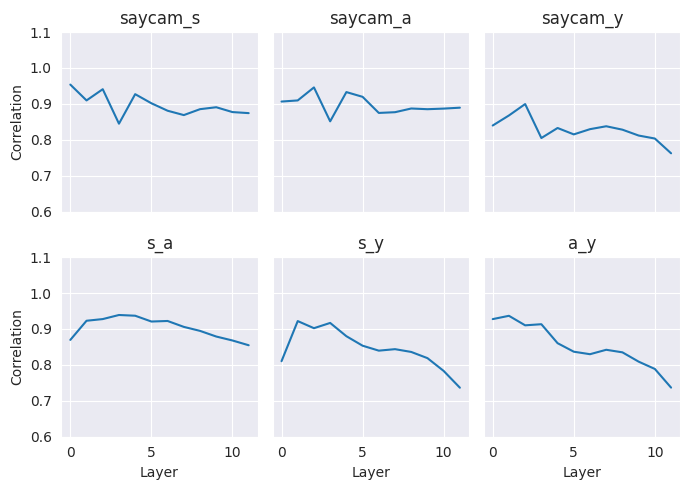

In [54]:
importlib.reload(rsa)
rsa.plot_similarities(SIMs, ['saycam', 'ego', 'imagenet', 'random', 'supervised'])
rsa.plot_similarities(SIMs, ['saycam', 's', 'a', 'y'])

Running t-SNE on dissimilarity matrix...


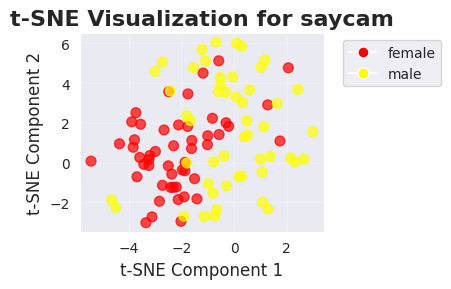

Silhouette Score: 0.155
Number of unique labels: 2

Label distribution:
  female: 50 images
  male: 50 images
Running t-SNE on dissimilarity matrix...


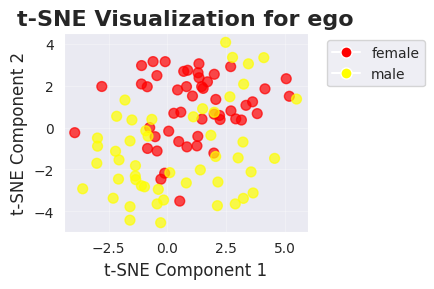

Silhouette Score: 0.139
Number of unique labels: 2

Label distribution:
  female: 50 images
  male: 50 images
Running t-SNE on dissimilarity matrix...


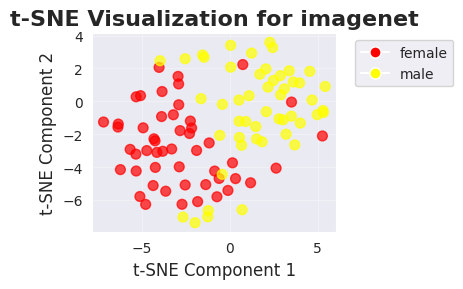

Silhouette Score: 0.300
Number of unique labels: 2

Label distribution:
  female: 50 images
  male: 50 images
Running t-SNE on dissimilarity matrix...


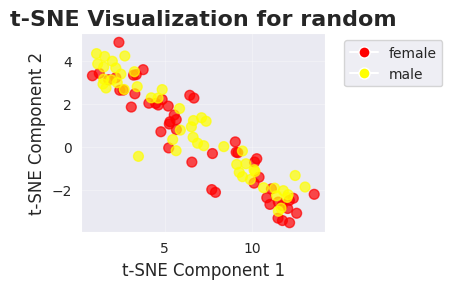

Silhouette Score: -0.006
Number of unique labels: 2

Label distribution:
  female: 50 images
  male: 50 images
Running t-SNE on dissimilarity matrix...


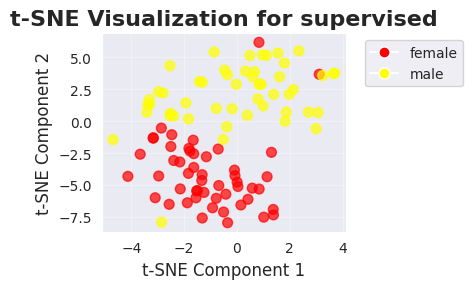

Silhouette Score: 0.455
Number of unique labels: 2

Label distribution:
  female: 50 images
  male: 50 images


In [56]:
# Main execution
importlib.reload(rsa)

from scipy.io import loadmat
# load metadata and get labels
metadata = loadmat('/raid/katha/datasets/faces_1000/test/metadata_male.mat')
### not sure what to do with it to be honest

labels1 = ['female' if i<50 else 'male' for i in range(100)]  # Animacy

# For demonstration, run with synthetic data
title = "t-SNE Visualization for saycam"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['saycam'][-1], labels1, title)

title = "t-SNE Visualization for ego"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['ego'][-1], labels1, title)

title = "t-SNE Visualization for imagenet"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['imagenet'][-1], labels1, title)

title = "t-SNE Visualization for random"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['random'][-1], labels1, title)

title = "t-SNE Visualization for supervised"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['supervised'][-1], labels1, title)
